### Load Libraries

In [1]:
import pandas as pd 
import numpy as np

#placeholder classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, roc_auc_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from sklearn import preprocessing

#for saving and loading ML models
import pickle

### Load Data from Parquet with Selected Columns

In [2]:
data_files = ["../archive/Combined_Flights_2018.parquet", "../archive/Combined_Flights_2019.parquet"]
columns_to_use = [
    # 'Airline',
    # 'Origin',
    # 'Dest',
    'CRSDepTime', 
    'Distance', 
    'Year', 
    'Quarter', 
    'Month', 
    'DayofMonth', 
    'DayOfWeek', 
    # 'DepTimeBlk', 
    # 'ArrTimeBlk', 
    'DistanceGroup',
    'ArrDelayMinutes'
    ]

data_list = list()
for i in range(len(data_files)):
    #in this scenario, data_temp will be recycled after the loop is completed
    data_temp = pd.read_parquet(data_files[i], columns = columns_to_use, engine="fastparquet")
    data_list.append(data_temp)
data_df = pd.concat(data_list, ignore_index=True)
data_list = list() #free the memory

<div class="alert alert-block alert-info">
<b>PLACEHOLDER:</b> This converts the data appropriately so that we can run the classification model. It's dirty but it works.
</div>

In [3]:
# placeholder, normalize data for testing
data_df.dropna(inplace=True)
normalized_df=(data_df-data_df.min())/(data_df.max()-data_df.min())
data_df = pd.DataFrame()
encoder = preprocessing.LabelEncoder()
for feature in normalized_df:
    print(feature)
    normalized_df[feature] = encoder.fit_transform(normalized_df[feature])
# normalized_df.info()



normalized_X = normalized_df.loc[:,'CRSDepTime':'DistanceGroup']
normalized_Y = normalized_df['ArrDelayMinutes']

size = len(normalized_Y)
normalized_X = normalized_X[:int(size/50)]
normalized_Y = normalized_Y[0:int(size/50)]

X_train, X_test, Y_train, Y_test = train_test_split(normalized_X, normalized_Y, test_size=0.33, random_state=0)
normalized_df = pd.DataFrame()
normalized_X = pd.DataFrame()
normalized_Y = []



# #update data types appropriately

# #bin the data


CRSDepTime
Distance
Year
Quarter
Month
DayofMonth
DayOfWeek
DistanceGroup
ArrDelayMinutes


/var/folders/jz/xzg8vj2x4vs8lg0vhsshlnc00000gn/T/ipykernel_13352/3885377948.py:18: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  normalized_Y = normalized_Y[0:int(size/50)]


### Generate and Train ML Model, then Save the Model

In [4]:
# assume data is ready
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf_model = clf.fit(X_train, Y_train)
Y_predict = clf_model.predict(X_test)


array([[<AxesSubplot: title={'center': 'target'}>]], dtype=object)

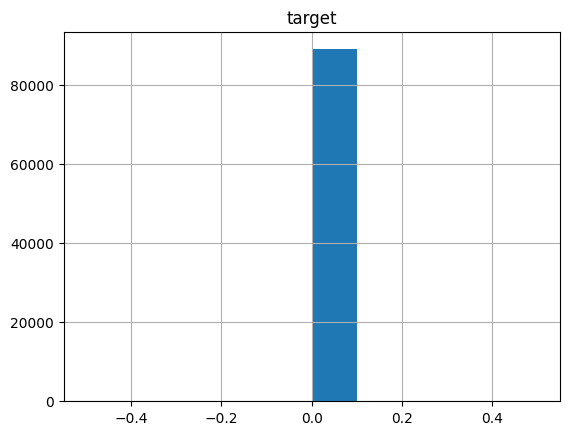

In [24]:
# f1 = f1_score(Y_test, Y_predict, average=None)
# roc_auc = roc_auc_score(Y_test, Y_predict)
# recall = recall_score(Y_test, Y_predict)
# precision = precision_score(Y_test, Y_predict)
# confusion_mtrx = confusion_matrix(Y_test, Y_predict)
# disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mtrx, display_labels=clf_model.classes_)
# disp.plot()
# plt.show()
prediction = pd.Series(Y_predict, name='target')
prediction.to_frame().hist()

In [8]:
# save the model for later use
filename = "delay_model.pkl"
pickle.dump(clf_model, open(filename, 'wb'))

### Function to determine best location and airline to take

In [22]:
def best_delay(features, target):
    # for each record, use airline, departure city, arrival city, departure market, arrival market, actual/predicted delay to determine best airline and departure city
    for index, row in features.iterrows():
        print(index, '===', target[index])
        if index == 3:
            break

if(X_test.first_valid_index() != 0):
    X_test.reset_index(inplace=True)
best_delay(X_test, Y_predict) 
    

0 === 0
1 === 0
2 === 0
3 === 0


### Predict against 2022

In [ ]:
# # the model is already trained, we do not need to keep the training data
# df = pd.DataFrame()

# # load the 2022 data
# combinedFlights2022 = "archive/Combined_Flights_2022.parquet"
# df = pd.read_parquet(combinedFlights2022, columns = columns_to_use, engine="fastparquet")
# # NOTE: if we are doing 2021+2022 data instead, we need to concatentate the data

# # run the data through the ML model to predict

# # take predicted delay and select best flight


### Use the Prediction Results for Performance Analysis